# Estatística com Python

## Testes de Hipótese

É uma metodologia estatística que nos auxilia a tomar decisões sobre uma ou mais populações baseado na informação obtida da amostra.

Nos permite verificar se os dados amostrais trazem evidência que apoiem ou não uma hipótese estatística formulada.

Ao tentarmos tomar decisões, é conveniente a formulação de suposições ou de conjeturas sobre as populações de interesse, que, em geral, consistem em considerações sobre parâmetros (μ,σ2,p
) das mesmas.

Essas suposições, que podem ser ou não verdadeiras, são denominadas de Hipóteses Estatísticas.

Em muitas situações práticas o interesse do pesquisador é verificar a veracidade sobre um ou mais parâmetros populacionais (μ,σ2,p
) ou sobre a distribuição de uma variável aleatória.

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('/home/joeldspy/Modelos/Datasets/dados.csv')

In [5]:
dataset.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# 1 - Introdução: Teste de Normalidade com Python

In [1]:
from scipy.stats import normaltest

In [2]:
alfa = 0.05

## 1.1 - Testando a Variável Renda

<AxesSubplot:>

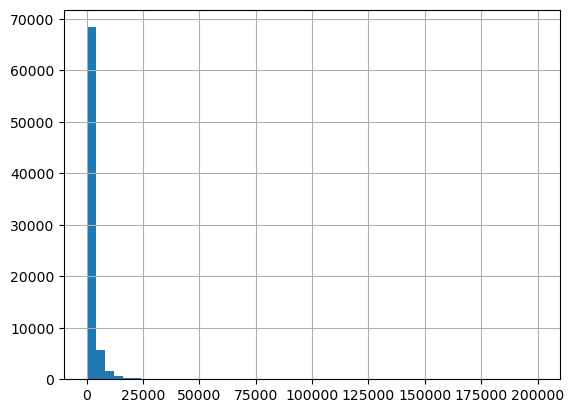

In [8]:
dataset['Renda'].hist(bins=50)

In [9]:
normaltest(dataset['Renda'])

NormaltestResult(statistic=152380.75803960307, pvalue=0.0)

In [11]:
# Rejeitar H0 se pvalue < alfa
normaltest(dataset['Renda'])[1] < alfa

True

## 1.2 - Testando a Variável Altura

<AxesSubplot:>

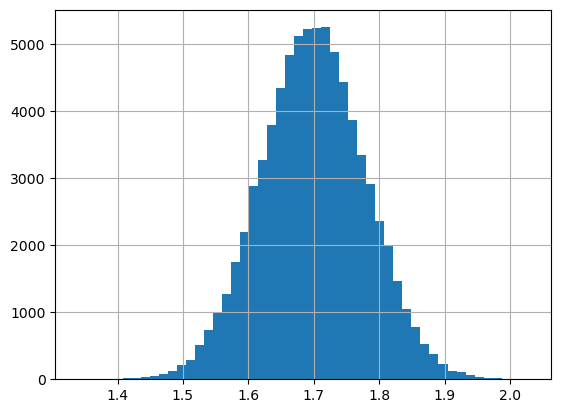

In [12]:
dataset['Altura'].hist(bins=50)

In [13]:
normaltest(dataset['Altura'])

NormaltestResult(statistic=0.19973093957002253, pvalue=0.9049591541967501)

In [15]:
# Rejeitar H0 se pvalue < alfa
normaltest(dataset['Altura'])[1] < alfa

False

## 2 - Testes Parâmetricos

A empresa Suco Bom produz sucos de frutas em embalagens de 500 ml.

Seu processo de produção é quase todo automatizado e as embalagens de suco são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os órgãos fiscalizadores.

Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção. O setor de controle de qualidade da empresa Suco Bom extrai, periodicamente, amostras de 50 embalagens para monitorar o processo de produção. Para cada amostra, é realizado um teste de hipóteses para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um nível de significância de 5%.

Suponha agora que uma amostra de 50 embalagens foi selecionada e que a média amostral observada foi de 503,24 ml. Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?

In [17]:
import numpy as np

In [18]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [20]:
media_amostra = np.mean(amostra); media_amostra

503.24

In [21]:
desvio_padrao_amostra = np.std(amostra); desvio_padrao_amostra

4.438738559545944

In [22]:
media_população = 500
alfa = 0.05
n = 50

![](https://imgur.com/W78yvZk.png)

In [23]:
from scipy.stats import norm

In [25]:
probabilidade = (0.5 + (1 - alfa) / 2)

z_alpha_2 = norm.ppf(probabilidade); z_alpha_2

1.959963984540054

![](https://dhg1h5j42swfq.cloudfront.net/2021/11/30195332/image-673.png)

In [26]:
z = (media_amostra - media_população) / ( (desvio_padrao_amostra) / (np.sqrt(n))); z

5.1614348092598155

![](https://imgur.com/Mgy1WgI.png)

In [29]:
z <= -z_alpha_2 or z >= z_alpha_2

True

## 3 - Teste Unicaudal